In [158]:
# Seaborn visualization library
import seaborn as sns

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas import read_excel
from pandas import DataFrame

In [147]:
#****** Running Forecast for Plot 1 *******  Note: Data has been QC-ed

#read Plot 1 data
data = read_excel('../plotData/SkyLine_QC0.xlsx', sheet_name='Flux') #index_col=13, parse_dates=[13]    

In [148]:
plot_file_path="../plotImages/"

In [149]:
data

QC  Plot_ID  DailyRep      treatment       Date   pv      ghg unit  \
0       0        7         0            F50 2019-03-26  ***  N2O_dry  mug   
1       0       11         0   F75 + Clover 2019-03-26  ***  N2O_dry  mug   
2       0       12         0           F100 2019-03-26  ***  N2O_dry  mug   
3       0       13         0            F75 2019-03-26  ***  N2O_dry  mug   
4       0       14         0            F50 2019-03-26  ***  N2O_dry  mug   
...    ..      ...       ...            ...        ...  ...      ...  ...   
36392   0       32         5  F75 + Compost 2019-06-30  ***  CO2_dry   mg   
36393   0       33         5   F50 + Clover 2019-06-30  ***  CO2_dry   mg   
36394   0       34         5            F50 2019-06-30  ***  CO2_dry   mg   
36395   0       35         5  F50 + Compost 2019-06-30  ***  CO2_dry   mg   
36396   0       36         5         Clover 2019-06-30  ***  CO2_dry   mg   

            flux      r2   nrmse   podpu  epoch_time            DateTime  
0       -76.9603  0.0782  0.2005  0.7741  1553623830 2019-03-26 18:07:00  
1      -108.6953  0.0852  0.1823  0.7372  1553625601 2019-03-26 18:37:00  
2       -89.4384  0.0902  0.1720  0.7898  1553626021 2019-03-26 18:44:00  
3        70.0648  0.0841  0.1829  0.8564  1553626467 2019-03-26 18:51:00  
4       -81.0646  0.0641  0.1695  0.7054  1553626891 2019-03-26 18:58:00  
...          ...     ...     ...     ...         ...                 ...  
36392  1073.0730  0.9970  0.0166  0.5670  1561936351 2019-06-30 23:09:00  
36393   926.1353  0.9879  0.0354  0.4470  1561936770 2019-06-30 23:16:00  
36394   612.4387  0.9867  0.0339  0.5861  1561937220 2019-06-30 23:24:00  
36395   828.4506  0.9956  0.0188  0.6006  1561937641 2019-06-30 23:31:00  
36396  1061.2370  0.9883  0.0328  0.4936  1561938179 2019-06-30 23:38:00  

[36397 rows x 14 columns]

In [ ]:
data.columns

In [ ]:
#Drop columns that are not required
#df.drop(['B', 'C'], axis=1)

data.drop(['QC', 'DailyRep', 'Date', 'pv', 'unit', 'r2', 'nrmse', 'podpu', 'epoch_time'], axis=1, inplace=True)

In [ ]:
data

In [ ]:
#data1 = data.copy()
#data1.drop(['treatment', 'ghg', 'DateTime'], axis=1, inplace=True)
#data1

## Univariate Density Plots
#plt.plot(data1)
#plt.show()

In [ ]:
#fmri = sns.load_dataset("fmri")
ax = sns.lineplot(x="Plot_ID", y="flux", data=data)

In [ ]:
ax = sns.lineplot(x="Plot_ID", y="flux", hue="ghg",
                  data=data)

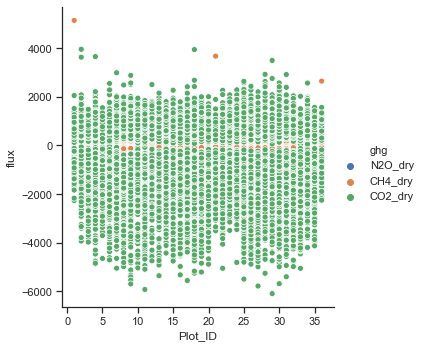

In [154]:
#plt.figure(figsize=(30,20))
#fig, ax = plt.subplots(figsize=(15,10))
sns.set(style="ticks")

g=sns.relplot(x="Plot_ID", y="flux", hue="ghg", ax=ax, data=data)

#Save boxplot as a file
#output file name  
output_file_name = "allPlots/AllPlots_gasflux_relplot.png" 
plot_file_name = plot_file_path + output_file_name

# save as png
plt.savefig(plot_file_name, dpi=150, bbox_inches='tight')



In [ ]:
#plt.figure(figsize=(30,20))
sns.relplot(x="Plot_ID", y="flux",
                hue="ghg", col="treatment", data=data, size=10, sizes=(10, 100))

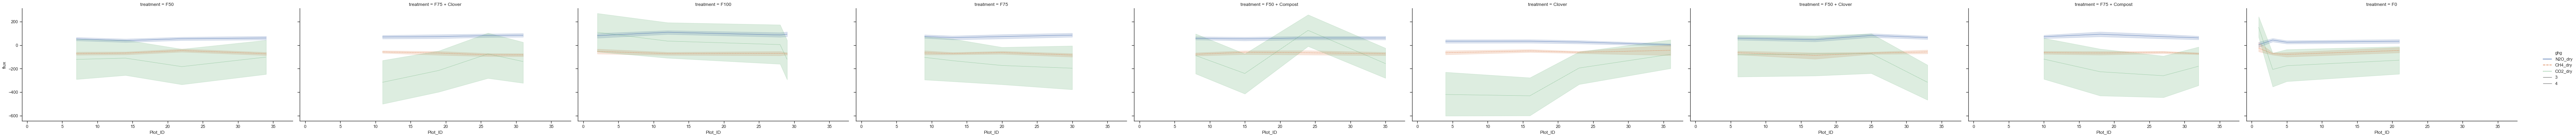

In [58]:
g = sns.relplot(x="Plot_ID", y="flux",
                     hue="ghg", style="ghg", col="treatment", size=4, aspect=2,
                      kind="line", data=data)  #sizes=(50, 100),

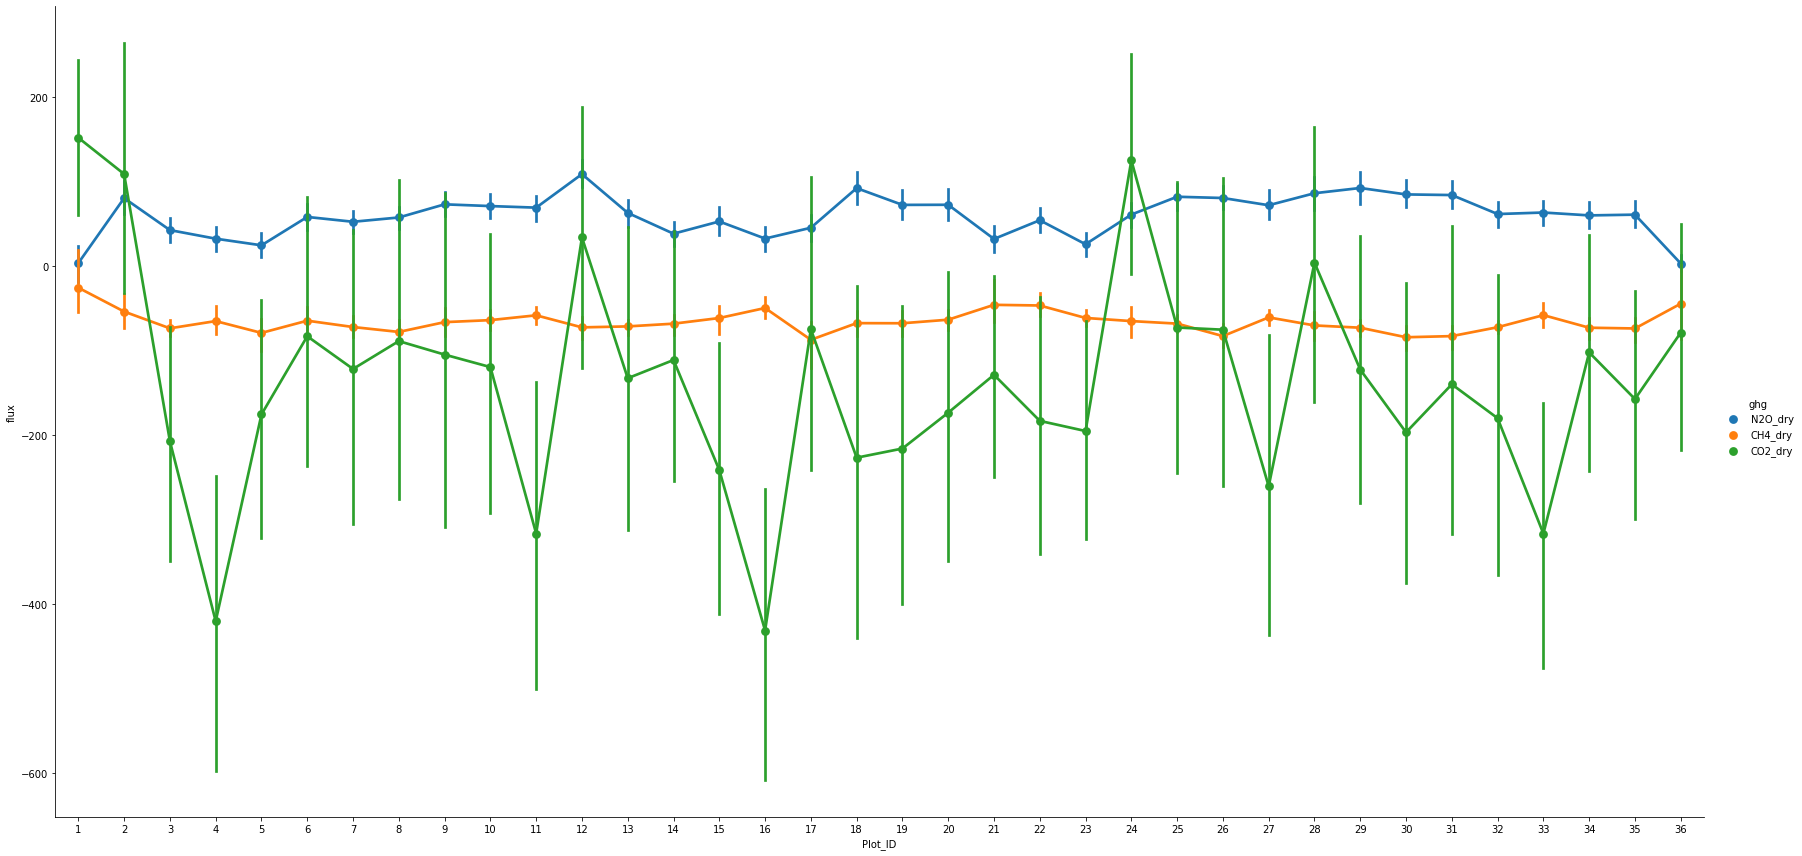

In [5]:
sns.catplot("Plot_ID", "flux", "ghg", data, kind="point", height=12, aspect=2)

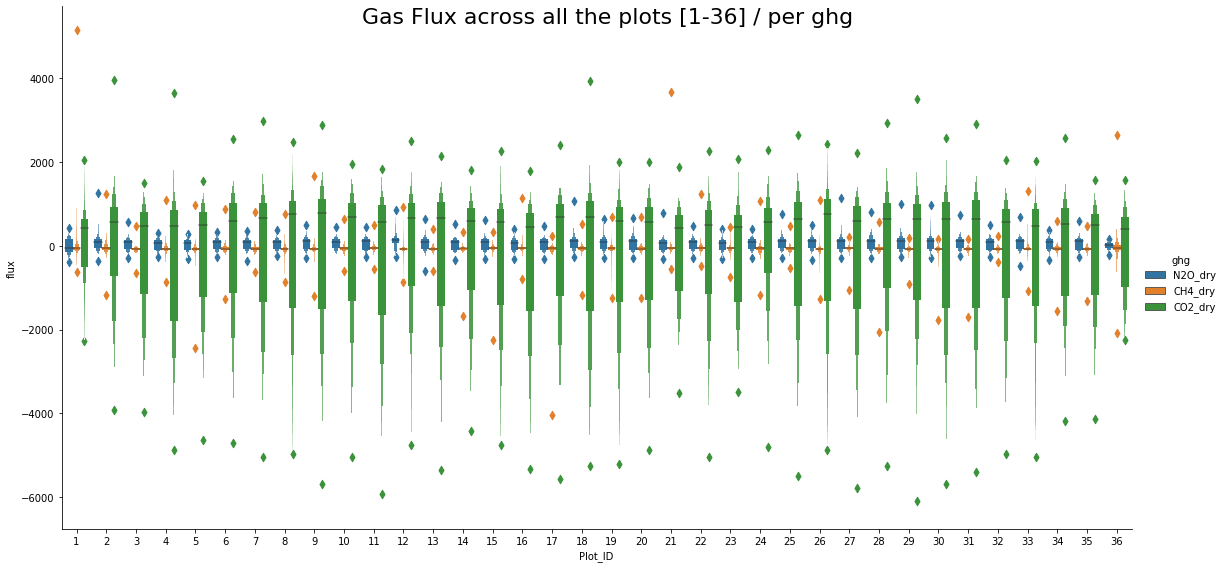

In [18]:
sns.catplot("Plot_ID", "flux", "ghg", data, kind="boxen", height=8, aspect=2)

plt.suptitle('Gas Flux across all the plots [1-36] / per ghg', size=22)

#Save boxplot as a file
#output file name  
output_file_name = "allPlots/AllPlots_gasflux_perghg_catplot.png" 
plot_file_name = plot_file_path + output_file_name

# save as png
plt.savefig(plot_file_name, dpi=150, bbox_inches='tight')

#separate the gases

In [ ]:


#fig, axs = plt.subplots(1,9)


#for i in axs:
#    sns.catplot(x="Plot_ID", y="flux", kind ='box', data=data, ax=axs[i])

#sns.set(style="ticks", color_codes=True)

x = data['Plot_ID']
y = data['flux']

g = sns.catplot("Plot_ID", col="treatment", col_wrap=2,
                data=data, kind="count", height=5.5, aspect=2)  

#for ax in g.axes.flat:
#    ax.plot(data['Plot_ID'], data['flux'])
    
for ax in g.axes.flatten():
    ax.set_xlabel(data['Plot_ID'], fontsize=15)
#    ax.set_xticks(data['Plot_ID'])
#    ax.set_ylabel('flux', fontsize=15)

    
# Set the ticks and ticklabels for all axes
#plt.setp([ax for ax in g.axes.flatten()], xticks=data['Plot_ID'], yticks=data['flux'])

    
#ax.set(xticks=[10, 20, 30], yticks=None);
#ax.set(xticks=[10, 30, 50], yticks=[2, 6, 10]);

#for axes in ax.axes.flat:
#    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)






#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

#for i in np.arange(9):
##     for j in np.arange(4):
#        ax1 = plot.facet_axis(0,i)
#        #plt.setp(ax1.get_xticklabels(), visible=True, rotation=45)
        
#        ax1.set_xticklabels(x)
#        for p in ax1.patches:
#            if str(p.get_height()) != 'nan':
#                ax1.text(p.get_x() + 0.06, p.get_height() * .8, '{0:.2f}%'.format(p.get_height()), color='white', rotation='vertical', size='large')
                

#for i in np.arange(5):
#     for j in np.arange(2):
#        ax1 = plot.facet_axis(i,j)
#        #plt.setp(ax1.get_xticklabels(), visible=True, rotation=45)
        
#        ax1[i,j].set_xticklabels(x)
#        #for p in ax1.patches:
#        #   if str(p.get_height()) != 'nan':
#        #        ax1.text(p.get_x() + 0.06, p.get_height() * .8, '{0:.2f}%'.format(p.get_height()), color='white', rotation='vertical', size='large')
                

#g.set_xlabel('Plot ID')
#g.set_ylabel('Flux')

#for ax in g.axes:
#    plt.setp(ax.get_xlabels(), visible=True, rotation=45)
    
#g.set_xlabels('Plot_ID')
#g.set_ylabels('flux')

#for ax in g.axes:
#    plt.setp(ax.get_xticklabels(), visible=True, rotation=45)
    
#for ax in g.axes.flatten():
#    ax.xlabel('Plot_ID', fontsize=15)
#    ax.ylabel('flux', fontsize=15)
    
#g.set_xlabel('Plot_ID', fontsize=15)
#g.set_ylabel('Flux', fontsize=15)    
    
#(g.set_axis_labels("Plot ID", "Treatment Count")
#  .set_xticklabels([w for w in range(36)]))
    
#plt.xticks([w for w in range(36)], [w for w in range(36)], rotation ='vertical')

#plt.show()



In [ ]:
series_plotid = data['Plot_ID'].tolist()
series_plotid

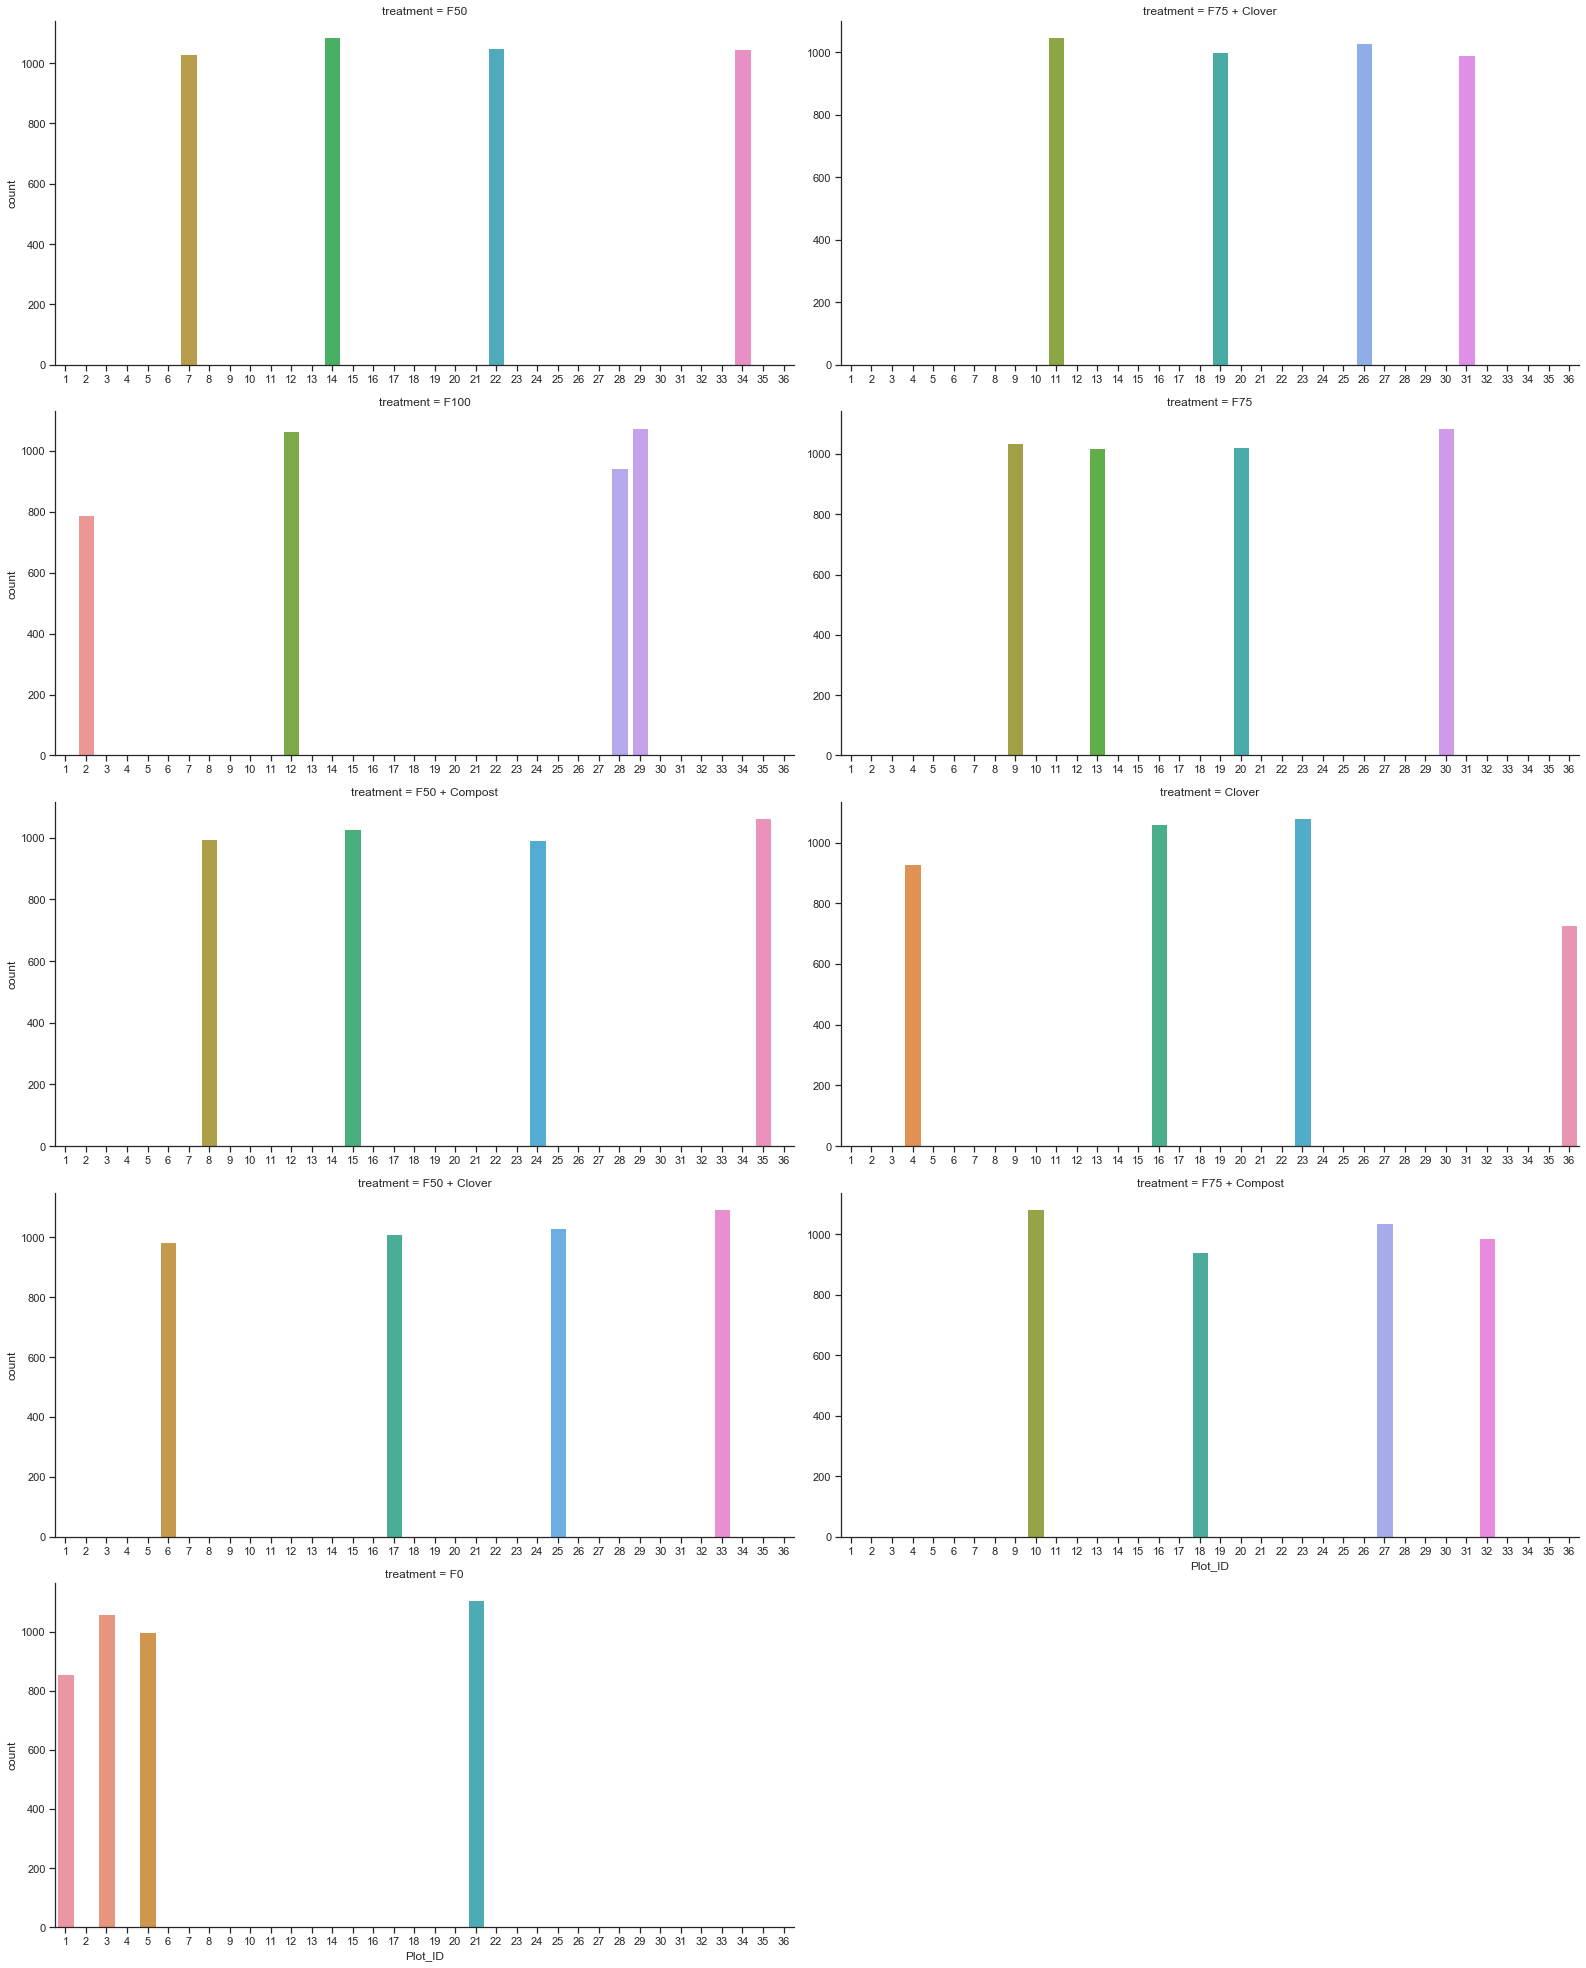

In [188]:

#fig, axs = plt.subplots()

axs = sns.catplot("Plot_ID", col="treatment", col_wrap=2,
                data=data, kind="count", height=5.5, aspect=2, sharex=False, sharey=False)

#for axes in g.axes.flatten():
#    #_ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
#    _ = axes.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36])
#    #ax.set_xlabel('Plot_ID', data['Plot_ID'])
#    _ = axes.set_xticks(data['Plot_ID'])


#col_plotid_list = data['Plot_ID'].tolist()
#col_plotid_list

for ax in axs.axes.flatten():
##    #ax.set_xlabel('x', fontsize=15)
   _ = ax.set_xticks(range(36))

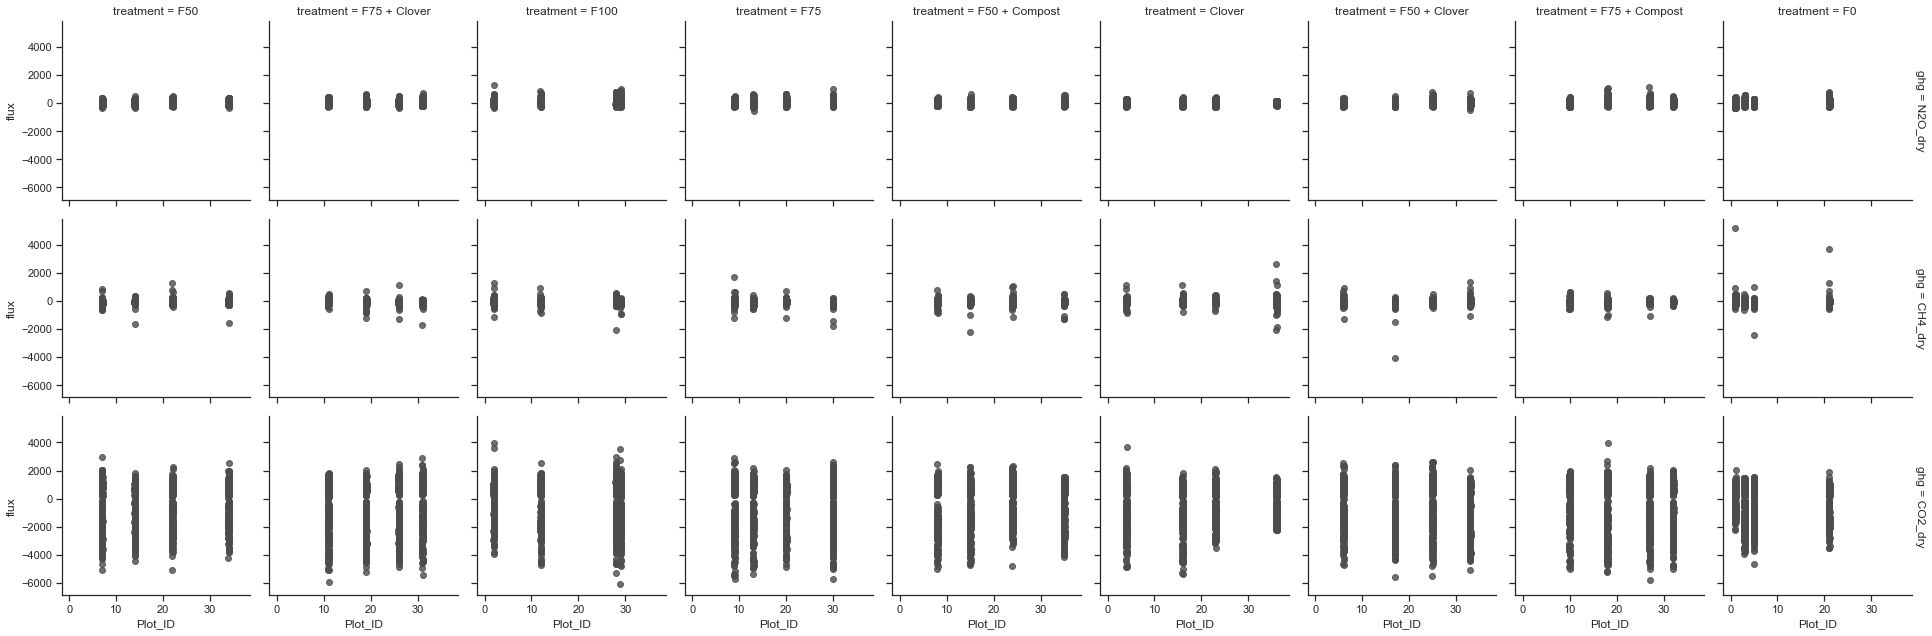

In [189]:
g = sns.FacetGrid(data, row="ghg", col="treatment", margin_titles=True)
g.map(sns.regplot, "Plot_ID", "flux", color=".3", fit_reg=False, x_jitter=.1);

#g.figure.set_figwidth(15)
#g.figure.set_figheight(15)

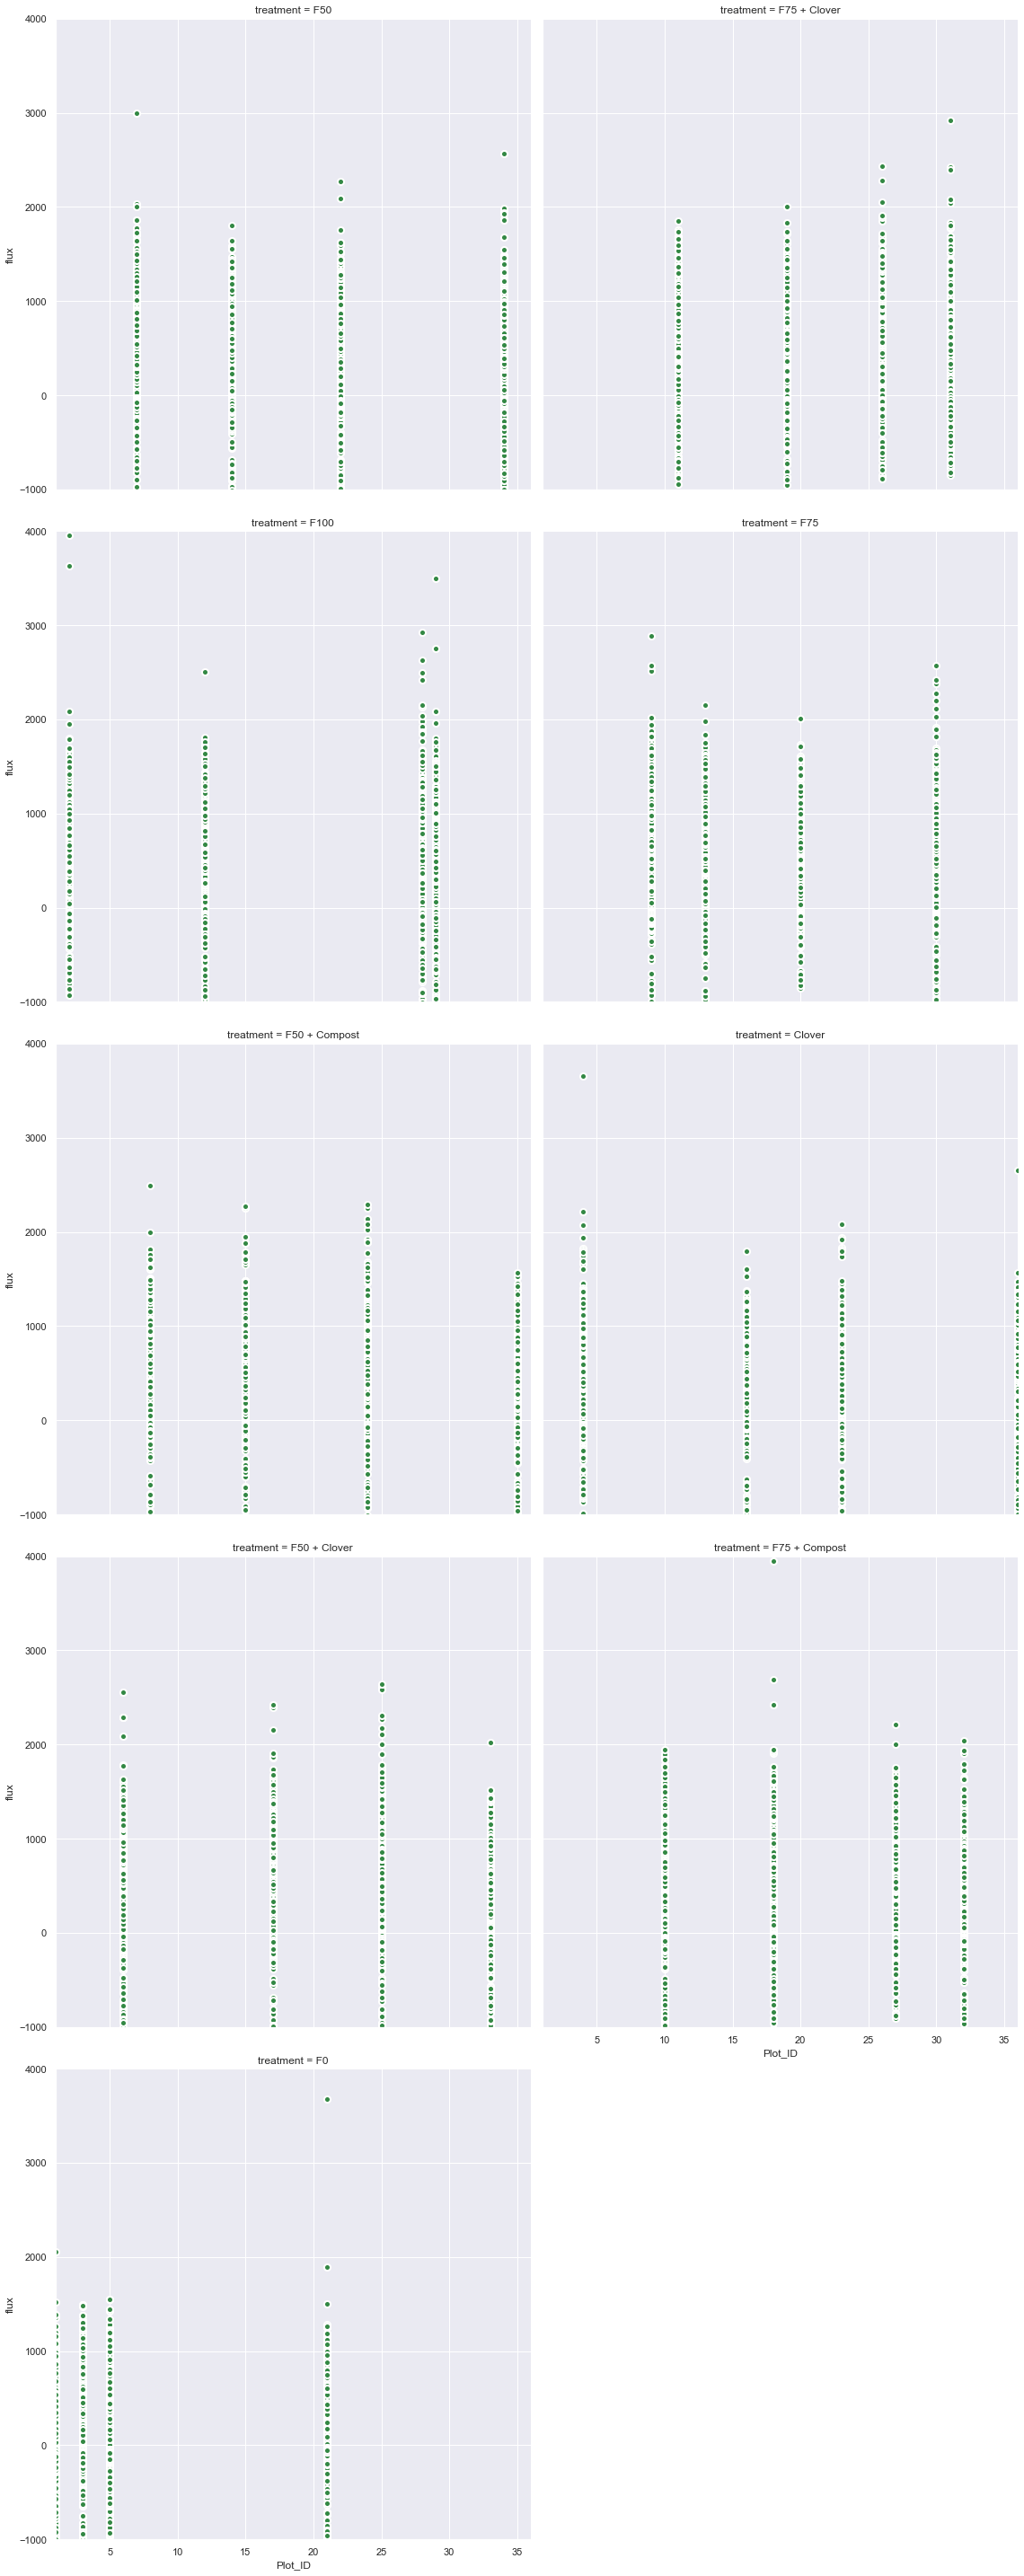

In [84]:
sns.set(style="darkgrid")
#sns.set(style="ticks", color_codes=True)
g = sns.FacetGrid(data, col="treatment", margin_titles=True, height=8, col_wrap=2)
g.map(plt.scatter, "Plot_ID", "flux", color="#338844", edgecolor="white", s=50, lw=2)
#for ax in g.axes.flat:
#    ax.plot((1, 36), (-2000, 4000), c=".2", ls="--")
g.set(xlim=(1, 36), ylim=(-1000, 4000));

#sns.catplot("Plot_ID", col="treatment", sharex=True, col_wrap=2,
#                data=data,
#                kind="count", height=5.5, aspect=2)


In [90]:

#fig, axs = plt.subplots(1,9)


#for i in axs:
#    sns.catplot(x="Plot_ID", y="flux", kind ='box', data=data, ax=axs[i])
#plt.close(2)
#plt.close(3)

#fig.tight_layout()

#g = sns.catplot(x="Plot_ID", y="flux", hue="ghg",
#                col="treatment", data=data,
#                height=5, aspect=.8)

In [91]:
#fig = plt.figure()


#fig, axs = plt.subplots(9)
#g = sns.catplot(x="Plot_ID", y="flux", hue="ghg",
#                col="treatment", data=data,
#               height=5, aspect=.8, ax=[ax1 for ax1 in axs])


##plt.close(2)
##plt.close(3)
#plt.tight_layout()

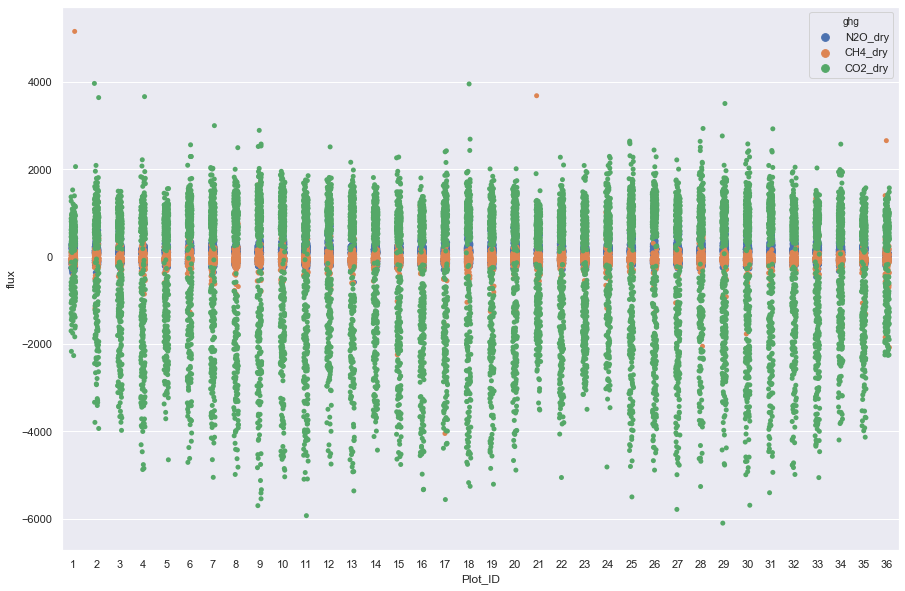

In [88]:
fig = plt.figure(figsize=(15,10))
p = sns.stripplot(data=data,
                  x='Plot_ID',
                  y='flux',
                  hue='ghg')

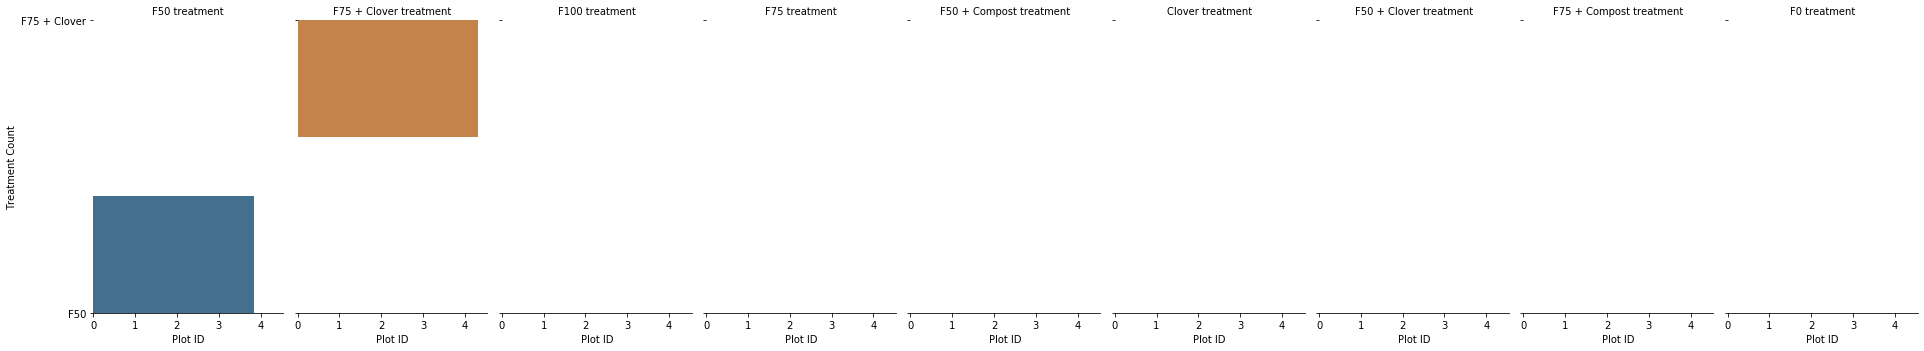

In [49]:
g = sns.catplot(x="Plot_ID", y="treatment", col="treatment",
                data=data, saturation=.5,
                kind="bar", ci=None, aspect=.6)
(g.set_axis_labels("Plot ID", "Treatment Count")
  .set_xticklabels([w for w in range(36)])
  .set_titles("{col_name} {col_var}")
  .set(ylim=(0, 1))
  .despine(left=True))  


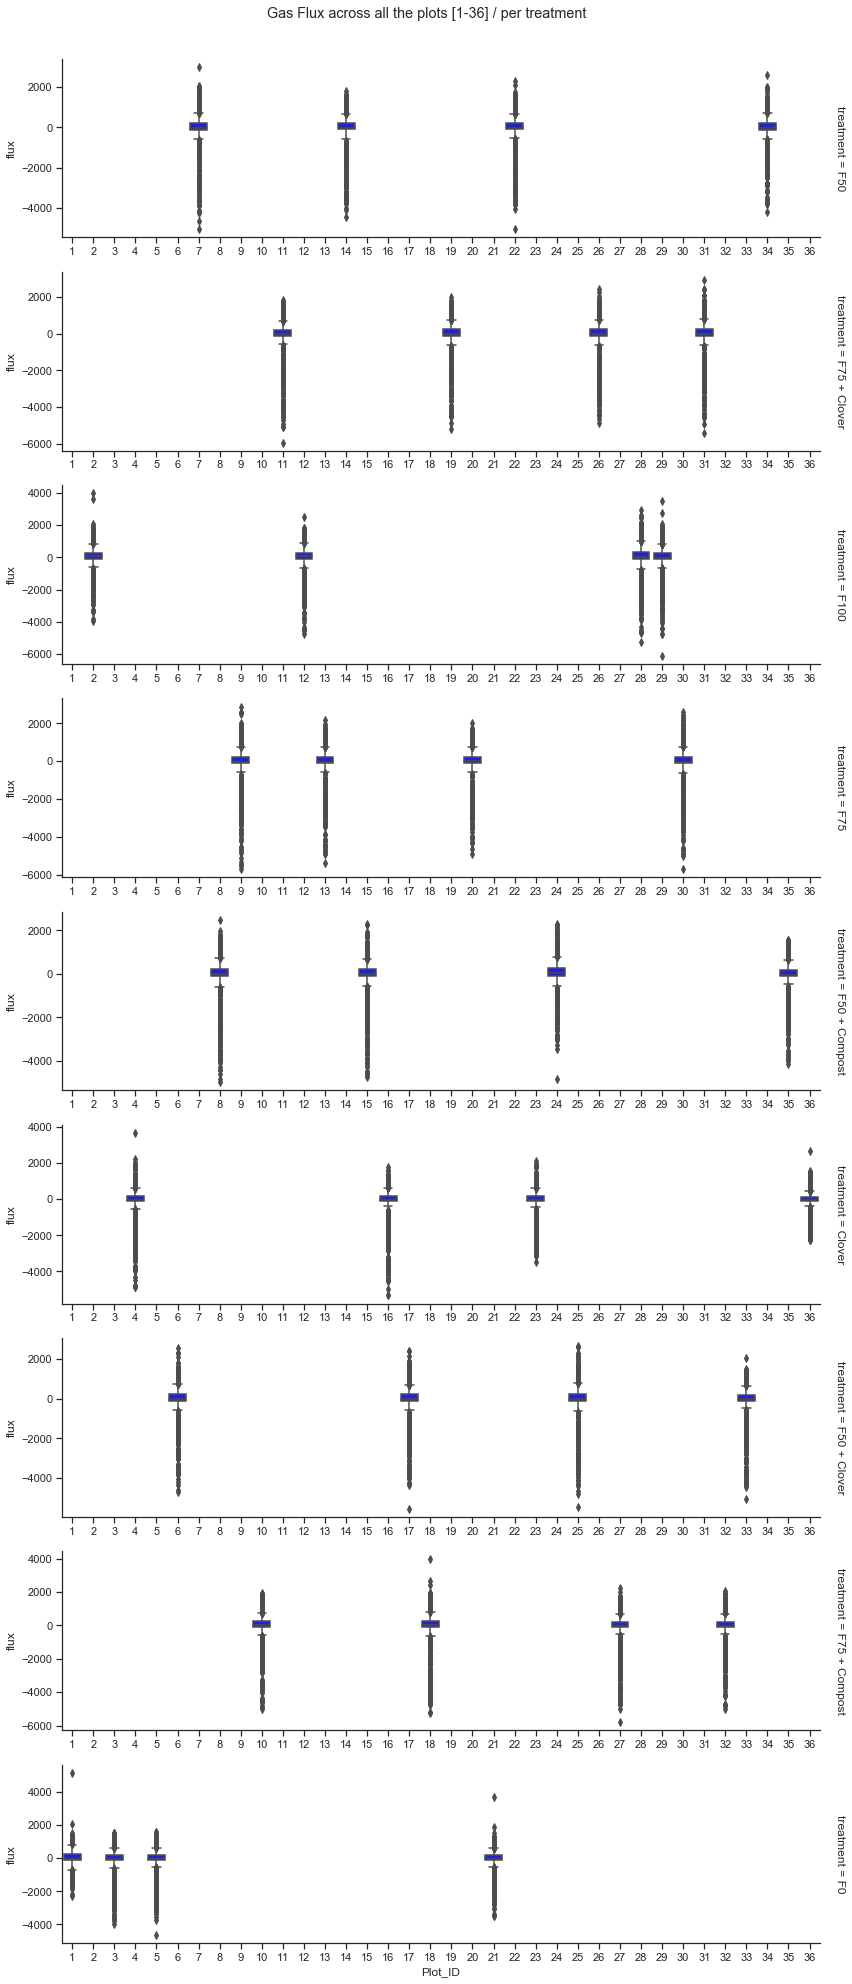

In [236]:

#fig = plt.figure()

g = sns.catplot(
    data=data,
    x='Plot_ID',
    y='flux',
    row='treatment',
    kind='box',
    height=3, 
    aspect=4,
    color='blue', sharex=False, sharey=False, margin_titles=True)

# Set title
#axes = g.axes.flatten()
#axes[0].set_title("Internal")
#axes[1].set_title("External")



#axes.set_title("boxplot")
g.fig.suptitle('Gas Flux across all the plots [1-36] / per treatment', y=1.02)
g.fig.tight_layout()
#g.fig.subplots_adjust(top=0.15, bottom=0.05)


#g.set_title('Gas Flux across all the plots [1-36] / per treatment', size=16)

#fig = g.figure.get_figure()
#fig.tight_layout()
#fig.subplots_adjust(top=0.15, bottom=0.05)

#plt.subplots_adjust(left=0.125,
#                   bottom=0.1, 
#                    right=0.9, 
#                    top=0.2, 
#                    wspace=0.7, 
#                   hspace=0.55)

#margin_titles

#Save boxplot as a file
#output file name  
output_file_name = "allPlots/AllPlots_gasflux_pertreatment_catplot.png" 
plot_file_name = plot_file_path + output_file_name

# save as png
plt.savefig(plot_file_name, dpi=80, bbox_inches='tight')


catplot kind attributes - point”, “bar”, “strip”, “swarm”, “box”, “violin”, or “boxen”

In [ ]:
#sns.set(style="ticks", color_codes=True)


#sns.catplot("Plot_ID", col="treatment", sharex=True, col_wrap=2,
#                data=data,
#                kind="swarm", height=5.5, aspect=2)


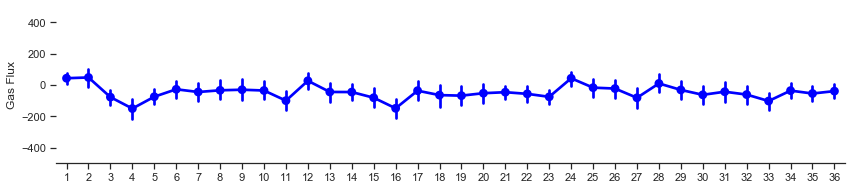

In [73]:
#Not looking accurate
g = sns.catplot(data=data, x='Plot_ID',y='flux', kind='point',height=3, aspect=4, color='blue')

(g.set_axis_labels("", "Gas Flux")
  #.set_xticklabels(["Men", "Women", "Children"])
  .set_titles("{col_name} {col_var}")
  .set(ylim=(-500, 500))
  .despine(left=True)) 
#row='Plot_ID'
#sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips);

In [76]:
#g = sns.catplot(x="Plot_ID", col="flux", col_wrap=5,
#                data=data,
#                kind="count", height=2.5, aspect=.8)

In [21]:
#g = sns.catplot(x="DateTime", y="flux",
#                hue="ghg", row="Plot_ID",
#                data=data,
#                orient="h", height=2, aspect=3, kind="box")

In [98]:
data

Plot_ID      treatment      ghg       flux            DateTime
0            7            F50  N2O_dry   -76.9603 2019-03-26 18:07:00
1           11   F75 + Clover  N2O_dry  -108.6953 2019-03-26 18:37:00
2           12           F100  N2O_dry   -89.4384 2019-03-26 18:44:00
3           13            F75  N2O_dry    70.0648 2019-03-26 18:51:00
4           14            F50  N2O_dry   -81.0646 2019-03-26 18:58:00
...        ...            ...      ...        ...                 ...
36392       32  F75 + Compost  CO2_dry  1073.0730 2019-06-30 23:09:00
36393       33   F50 + Clover  CO2_dry   926.1353 2019-06-30 23:16:00
36394       34            F50  CO2_dry   612.4387 2019-06-30 23:24:00
36395       35  F50 + Compost  CO2_dry   828.4506 2019-06-30 23:31:00
36396       36         Clover  CO2_dry  1061.2370 2019-06-30 23:38:00

[36397 rows x 5 columns]

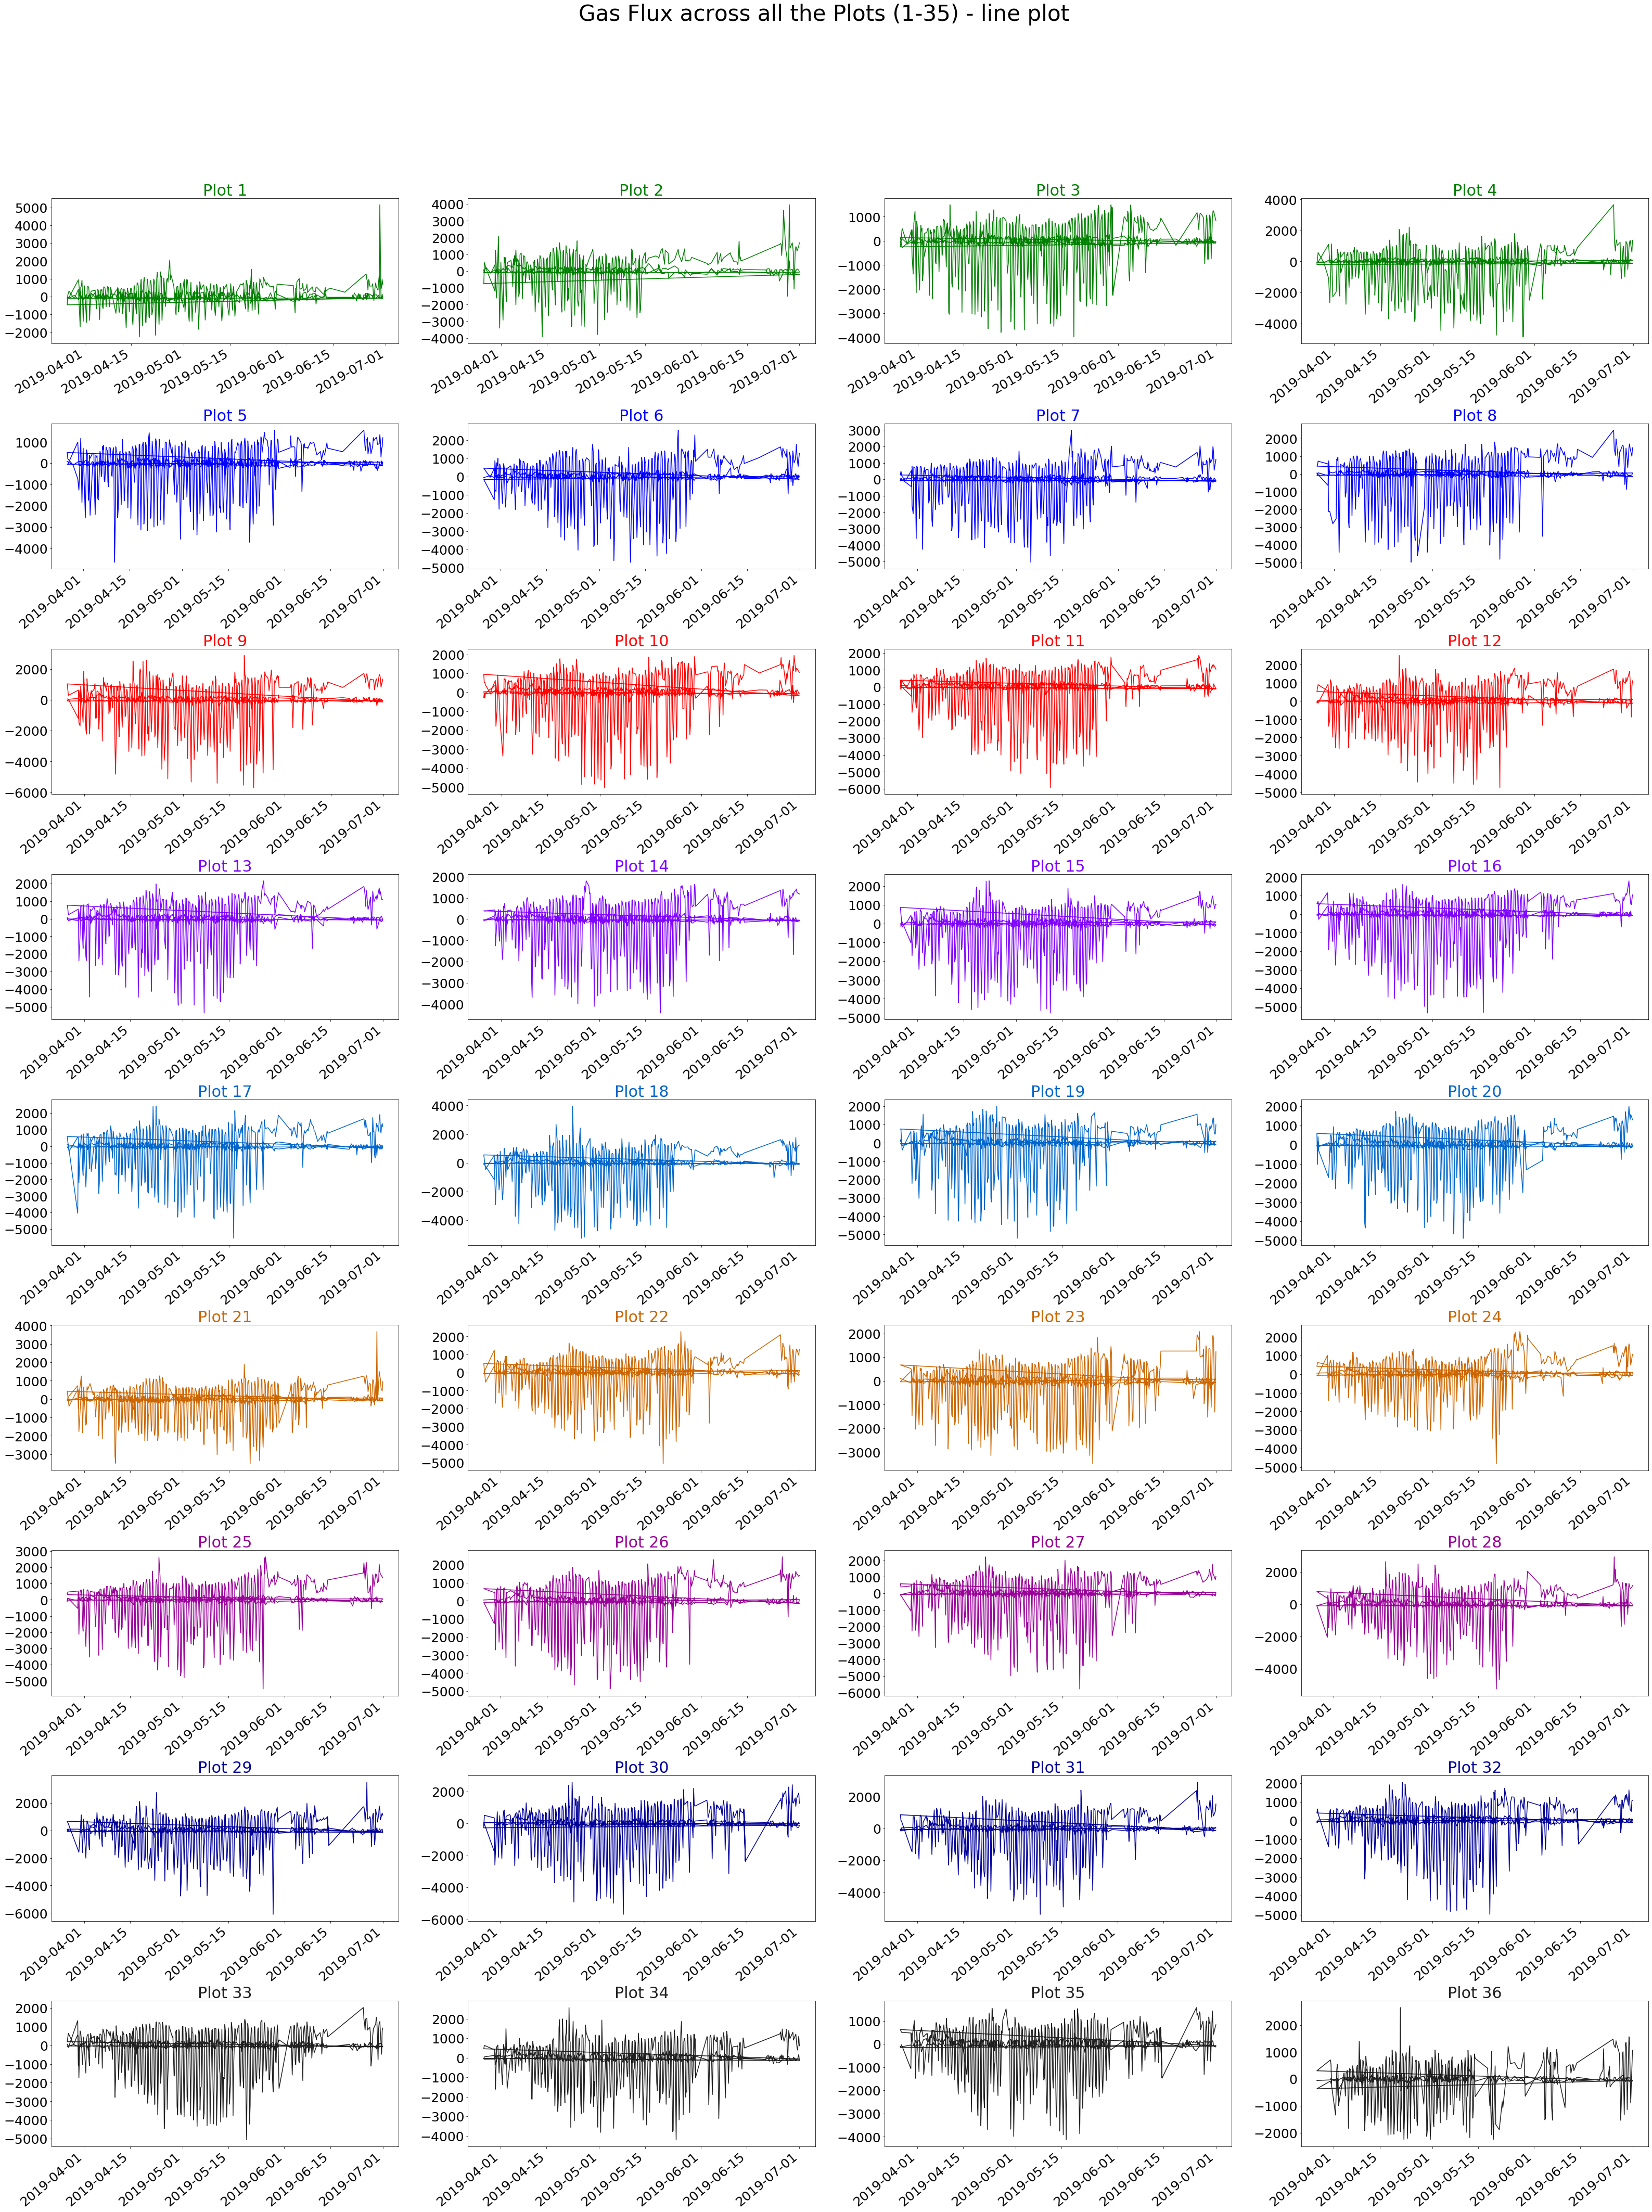

In [29]:
#plot the different data frames

#data[data['Plot_ID'] == 1]  boolean indexing

plt.figure(figsize=(55,65))  
plt.suptitle('Gas Flux across all the Plots (1-36) - line plot', color='black', size=42)

plt.subplot(941)
plt.xticks(rotation=30, ha='right', fontsize=25)
plt.yticks(fontsize=25)
plt.title('Plot 1', color='green', fontsize=30)
plt.plot(data[data['Plot_ID'] == 1]['DateTime'], data[data['Plot_ID'] == 1]['flux'], color='green')

plt.subplot(942)
plt.xticks(rotation=30, ha='right', fontsize=25)
plt.yticks(fontsize=25)
plt.title('Plot 2', color='green', fontsize=30)
plt.plot(data[data['Plot_ID'] == 2]['DateTime'], data[data['Plot_ID'] == 2]['flux'], color='green')

plt.subplot(943)
plt.xticks(rotation=30, ha='right', fontsize=25)
plt.yticks(fontsize=25)
plt.title('Plot 3', color='green', fontsize=30)
plt.plot(data[data['Plot_ID'] == 3]['DateTime'], data[data['Plot_ID'] == 3]['flux'], color='green')

plt.subplot(944)
plt.xticks(rotation=40, ha='right', fontsize=25)
plt.yticks(fontsize=25)
plt.title('Plot 4', color='green', fontsize=30)
plt.plot(data[data['Plot_ID'] == 4]['DateTime'], data[data['Plot_ID'] == 4]['flux'], color='green')

plt.subplot(945)
plt.xticks(rotation=40, ha='right', fontsize=25)
plt.yticks(fontsize=25)
plt.title('Plot 5', color='blue', fontsize=30)
plt.plot(data[data['Plot_ID'] == 5]['DateTime'], data[data['Plot_ID'] == 5]['flux'], color='blue')

plt.subplot(946)
plt.xticks(rotation=40, ha='right', fontsize=25)
plt.yticks(fontsize=25)
plt.title('Plot 6', color='blue', fontsize=30)
plt.plot(data[data['Plot_ID'] == 6]['DateTime'], data[data['Plot_ID'] == 6]['flux'], color='blue')

plt.subplot(947)
plt.xticks(rotation=40, ha='right', fontsize=25)
plt.yticks(fontsize=25)
plt.title('Plot 7', color='blue', fontsize=30)
plt.plot(data[data['Plot_ID'] == 7]['DateTime'], data[data['Plot_ID'] == 7]['flux'], color='blue')

plt.subplot(948)
plt.xticks(rotation=40, ha='right', fontsize=25)
plt.yticks(fontsize=25)
plt.title('Plot 8', color='blue', fontsize=30)
plt.plot(data[data['Plot_ID'] == 8]['DateTime'], data[data['Plot_ID'] == 8]['flux'], color='blue')

plt.subplot(949)
plt.xticks(rotation=40, ha='right', fontsize=25)
plt.yticks(fontsize=25)
plt.title('Plot 9', color='red', fontsize=30)
plt.plot(data[data['Plot_ID'] == 9]['DateTime'], data[data['Plot_ID'] == 9]['flux'], color='red')

plt.subplot(9,4,10)
plt.xticks(rotation=40, ha='right', fontsize=25)
plt.yticks(fontsize=25)
plt.title('Plot 10', color='red', fontsize=30)
plt.plot(data[data['Plot_ID'] == 10]['DateTime'], data[data['Plot_ID'] == 10]['flux'], color='red')

plt.subplot(9,4,11)
plt.xticks(rotation=40, ha='right', fontsize=25)
plt.yticks(fontsize=25)
plt.title('Plot 11', color='red', fontsize=30)
plt.plot(data[data['Plot_ID'] == 11]['DateTime'], data[data['Plot_ID'] == 11]['flux'], color='red')

plt.subplot(9,4,12)
plt.xticks(rotation=40, ha='right', fontsize=25)
plt.yticks(fontsize=25)
plt.title('Plot 12', color='red', fontsize=30)
plt.plot(data[data['Plot_ID'] == 12]['DateTime'], data[data['Plot_ID'] == 12]['flux'], color='red')

plt.subplot(9,4,13)
plt.xticks(rotation=40, ha='right', fontsize=25)
plt.yticks(fontsize=25)
plt.title('Plot 13', color='#7F00FF', fontsize=30)
plt.plot(data[data['Plot_ID'] == 13]['DateTime'], data[data['Plot_ID'] == 13]['flux'], color='#7F00FF')

plt.subplot(9,4,14)
plt.xticks(rotation=40, ha='right', fontsize=25)
plt.yticks(fontsize=25)
plt.title('Plot 14', color='#7F00FF', fontsize=30)
plt.plot(data[data['Plot_ID'] == 14]['DateTime'], data[data['Plot_ID'] == 14]['flux'], color='#7F00FF')

plt.subplot(9,4,15)
plt.xticks(rotation=40, ha='right', fontsize=25)
plt.yticks(fontsize=25)
plt.title('Plot 15', color='#7F00FF', fontsize=30)
plt.plot(data[data['Plot_ID'] == 15]['DateTime'], data[data['Plot_ID'] == 15]['flux'], color='#7F00FF')

plt.subplot(9,4,16)
plt.xticks(rotation=40, ha='right', fontsize=25)
plt.yticks(fontsize=25)
plt.title('Plot 16', color='#7F00FF', fontsize=30)
plt.plot(data[data['Plot_ID'] == 16]['DateTime'], data[data['Plot_ID'] == 16]['flux'], color='#7F00FF')

plt.subplot(9,4,17)
plt.xticks(rotation=40, ha='right', fontsize=25)
plt.yticks(fontsize=25)
plt.title('Plot 17', color='#0066CC', fontsize=30)
plt.plot(data[data['Plot_ID'] == 17]['DateTime'], data[data['Plot_ID'] == 17]['flux'], color='#0066CC')

plt.subplot(9,4,18)
plt.xticks(rotation=40, ha='right', fontsize=25)
plt.yticks(fontsize=25)
plt.title('Plot 18', color='#0066CC', fontsize=30)
plt.plot(data[data['Plot_ID'] == 18]['DateTime'], data[data['Plot_ID'] == 18]['flux'], color='#0066CC')

plt.subplot(9,4,19)
plt.xticks(rotation=40, ha='right', fontsize=25)
plt.yticks(fontsize=25)
plt.title('Plot 19', color='#0066CC', fontsize=30)
plt.plot(data[data['Plot_ID'] == 19]['DateTime'], data[data['Plot_ID'] == 19]['flux'], color='#0066CC')

plt.subplot(9,4,20)
plt.xticks(rotation=40, ha='right', fontsize=25)
plt.yticks(fontsize=25)
plt.title('Plot 20', color='#0066CC', fontsize=30)
plt.plot(data[data['Plot_ID'] == 20]['DateTime'], data[data['Plot_ID'] == 20]['flux'], color='#0066CC')

plt.subplot(9,4,21)
plt.xticks(rotation=40, ha='right', fontsize=25)
plt.yticks(fontsize=25)
plt.title('Plot 21', color='#CC6600', fontsize=30)
plt.plot(data[data['Plot_ID'] == 21]['DateTime'], data[data['Plot_ID'] == 21]['flux'], color='#CC6600')

plt.subplot(9,4,22)
plt.xticks(rotation=40, ha='right', fontsize=25)
plt.yticks(fontsize=25)
plt.title('Plot 22', color='#CC6600', fontsize=30)
plt.plot(data[data['Plot_ID'] == 22]['DateTime'], data[data['Plot_ID'] == 22]['flux'], color='#CC6600')

plt.subplot(9,4,23)
plt.xticks(rotation=40, ha='right', fontsize=25)
plt.yticks(fontsize=25)
plt.title('Plot 23', color='#CC6600', fontsize=30)
plt.plot(data[data['Plot_ID'] == 23]['DateTime'], data[data['Plot_ID'] == 23]['flux'], color='#CC6600')

plt.subplot(9,4,24)
plt.xticks(rotation=40, ha='right', fontsize=25)
plt.yticks(fontsize=25)
plt.title('Plot 24', color='#CC6600', fontsize=30)
plt.plot(data[data['Plot_ID'] == 24]['DateTime'], data[data['Plot_ID'] == 24]['flux'], color='#CC6600')

plt.subplot(9,4,25)
plt.xticks(rotation=40, ha='right', fontsize=25)
plt.yticks(fontsize=25)
plt.title('Plot 25', color='#990099', fontsize=30)
plt.plot(data[data['Plot_ID'] == 25]['DateTime'], data[data['Plot_ID'] == 25]['flux'], color='#990099')

plt.subplot(9,4,26)
plt.xticks(rotation=40, ha='right', fontsize=25)
plt.yticks(fontsize=25)
plt.title('Plot 26', color='#990099', fontsize=30)
plt.plot(data[data['Plot_ID'] == 26]['DateTime'], data[data['Plot_ID'] == 26]['flux'], color='#990099')

plt.subplot(9,4,27)
plt.xticks(rotation=40, ha='right', fontsize=25)
plt.yticks(fontsize=25)
plt.title('Plot 27', color='#990099', fontsize=30)
plt.plot(data[data['Plot_ID'] == 27]['DateTime'], data[data['Plot_ID'] == 27]['flux'], color='#990099')

plt.subplot(9,4,28)
plt.xticks(rotation=40, ha='right', fontsize=25)
plt.yticks(fontsize=25)
plt.title('Plot 28', color='#990099', fontsize=30)
plt.plot(data[data['Plot_ID'] == 28]['DateTime'], data[data['Plot_ID'] == 28]['flux'], color='#990099')

plt.subplot(9,4,29)
plt.xticks(rotation=40, ha='right', fontsize=25)
plt.yticks(fontsize=25)
plt.title('Plot 29', color='#000099', fontsize=30)
plt.plot(data[data['Plot_ID'] == 29]['DateTime'], data[data['Plot_ID'] == 29]['flux'], color='#000099')

plt.subplot(9,4,30)
plt.xticks(rotation=40, ha='right', fontsize=25)
plt.yticks(fontsize=25)
plt.title('Plot 30', color='#000099', fontsize=30)
plt.plot(data[data['Plot_ID'] == 30]['DateTime'], data[data['Plot_ID'] == 30]['flux'], color='#000099')

plt.subplot(9,4,31)
plt.xticks(rotation=40, ha='right', fontsize=25)
plt.yticks(fontsize=25)
plt.title('Plot 31', color='#000099', fontsize=30)
plt.plot(data[data['Plot_ID'] == 31]['DateTime'], data[data['Plot_ID'] == 31]['flux'], color='#000099')

plt.subplot(9,4,32)
plt.xticks(rotation=40, ha='right', fontsize=25)
plt.yticks(fontsize=25)
plt.title('Plot 32', color='#000099', fontsize=30)
plt.plot(data[data['Plot_ID'] == 32]['DateTime'], data[data['Plot_ID'] == 32]['flux'], color='#000099')

plt.subplot(9,4,33)
plt.xticks(rotation=40, ha='right', fontsize=25)
plt.yticks(fontsize=25)
plt.title('Plot 33', color='#202020', fontsize=30)
plt.plot(data[data['Plot_ID'] == 33]['DateTime'], data[data['Plot_ID'] == 33]['flux'], color='#202020')

plt.subplot(9,4,34)
plt.xticks(rotation=40, ha='right', fontsize=25)
plt.yticks(fontsize=25)
plt.title('Plot 34', color='#202020', fontsize=30)
plt.plot(data[data['Plot_ID'] == 34]['DateTime'], data[data['Plot_ID'] == 34]['flux'], color='#202020')

plt.subplot(9,4,35)
plt.xticks(rotation=40, ha='right', fontsize=25)
plt.yticks(fontsize=25)
plt.title('Plot 35', color='#202020', fontsize=30)
plt.plot(data[data['Plot_ID'] == 35]['DateTime'], data[data['Plot_ID'] == 35]['flux'], color='#202020')

plt.subplot(9,4,36)
plt.xticks(rotation=40, ha='right', fontsize=25)
plt.yticks(fontsize=25)
plt.title('Plot 36', color='#202020', fontsize=30)
plt.plot(data[data['Plot_ID'] == 36]['DateTime'], data[data['Plot_ID'] == 36]['flux'], color='#202020')


plt.tight_layout()

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.55)

#Save boxplot as a file
#output file name  
output_file_name = "allPlots/AllPlots_gasflux.png" 
plot_file_name = plot_file_path + output_file_name

# save as png
plt.savefig(plot_file_name, dpi=250, bbox_inches='tight')

plt.show()

In [ ]:
#Plot the gases separately across all the plots



In [173]:
#Plot the dataframe with the gas flux and the met data  - pairplot to see the correlation between the flux and the different met parameters

#read the metdata+gas flux across all plots together
#read All Plot data
data_allplots_met = read_excel('../PlotData/Met_GasFluxData_AllPlots.xlsx', sheet_name='Sheet1') #index_col=13, parse_dates=[13]    

In [174]:
data_allplots_met.drop('Unnamed: 0', axis=1, inplace=True)

#drop a few columns - to do the pairplot
data_allplots_met

Flux      ghg flux_unit  PPFD_1_1_1  SWin_1_1_1  SWout_1_1_1  \
0        30.5901  N2O_dry       mug     277.500    146.1500      33.1400   
1       -62.9864  N2O_dry       mug     277.500    146.1500      33.1400   
2        78.1063  N2O_dry       mug     277.500    146.1500      33.1400   
3      -144.0262  N2O_dry       mug     277.500    146.1500      33.1400   
4       -98.0357  CH4_dry       mug     277.500    146.1500      33.1400   
...          ...      ...       ...         ...         ...          ...   
36038   -87.6598  CH4_dry       mug       0.005     -2.3615       0.5265   
36039  1276.1330  CO2_dry        mg       0.005     -2.3615       0.5265   
36040   854.8537  CO2_dry        mg       0.005     -2.3615       0.5265   
36041   799.8640  CO2_dry        mg       0.005     -2.3615       0.5265   
36042  1338.9420  CO2_dry        mg       0.005     -2.3615       0.5265   

       LWin_1_1_1  LWout_1_1_1  Rnet_1_1_1    G_1_1_1  ...  TDT4_Ts_1_1_1  \
0          267.10       366.25      13.860   1.185082  ...          13.60   
1          267.10       366.25      13.860   1.185082  ...          13.60   
2          267.10       366.25      13.860   1.185082  ...          13.60   
3          267.10       366.25      13.860   1.185082  ...          13.60   
4          267.10       366.25      13.860   1.185082  ...          13.60   
...           ...          ...         ...        ...  ...            ...   
36038      301.35       381.95     -83.488 -32.503650  ...          18.15   
36039      301.35       381.95     -83.488 -32.503650  ...          18.15   
36040      301.35       381.95     -83.488 -32.503650  ...          18.15   
36041      301.35       381.95     -83.488 -32.503650  ...          18.15   
36042      301.35       381.95     -83.488 -32.503650  ...          18.15   

       VWC_1_1_1  VWC_2_1_1  VWC_3_1_1  VWC_4_1_1  WaterLevel_1_1_1  \
0           18.6      27.75      30.25      36.05             -9999   
1           18.6      27.75      30.25      36.05             -9999   
2           18.6      27.75      30.25      36.05             -9999   
3           18.6      27.75      30.25      36.05             -9999   
4           18.6      27.75      30.25      36.05             -9999   
...          ...        ...        ...        ...               ...   
36038       12.9      19.30      20.30      24.85             -9999   
36039       12.9      19.30      20.30      24.85             -9999   
36040       12.9      19.30      20.30      24.85             -9999   
36041       12.9      19.30      20.30      24.85             -9999   
36042       12.9      19.30      20.30      24.85             -9999   

       SigStrength_1_1_1  AGC_1_1_1   TIMESTAMP_1_value  TIMESTAMP_1_rounded  
0                  100.0      -9999 2019-03-26 17:30:00  2019-03-26 17:30:00  
1                  100.0      -9999 2019-03-26 17:30:00  2019-03-26 17:30:00  
2                  100.0      -9999 2019-03-26 17:30:00  2019-03-26 17:30:00  
3                  100.0      -9999 2019-03-26 17:30:00  2019-03-26 17:30:00  
4                  100.0      -9999 2019-03-26 17:30:00  2019-03-26 17:30:00  
...                  ...        ...                 ...                  ...  
36038              100.0      -9999 2019-06-30 02:00:00  2019-06-30 02:00:00  
36039              100.0      -9999 2019-06-30 02:00:00  2019-06-30 02:00:00  
36040              100.0      -9999 2019-06-30 02:00:00  2019-06-30 02:00:00  
36041              100.0      -9999 2019-06-30 02:00:00  2019-06-30 02:00:00  
36042              100.0      -9999 2019-06-30 02:00:00  2019-06-30 02:00:00  

[36043 rows x 33 columns]

In [ ]:
#Plot the above dataframe - using sns pairplot
sns.pairplot(data_allplots_met)

#note: from below cells onwards, code does not work

In [ ]:
#ax = sns.lineplot(x="DateTime", y="flux", hue="Plot_ID",
 #                 data=data) 

In [ ]:
#ax = sns.lineplot(x="Plot_ID", y="flux", hue="ghg",
#                  data=data)

#g = sns.relplot(x="Plot_ID", y="flux",
#                 col="ghg", hue="treatment", 
#                 kind="line", data=data)  #style="ghg",

In [ ]:
#fig, ax = plt.subplots(figsize=(15,10))
#sns.barplot(x="Plot_ID", y="flux", col="treatment", hue="ghg", 
#                 kind="line", data=data)

In [ ]:
#fig, ax = plt.subplots(figsize=(15,10))
#sns.barplot(x="Plot_ID", y="flux",
#                  hue="ghg", 
#                 kind="line", data=data)

In [ ]:
#plt.figure(figsize=(40,25))
#sns.relplot(x="Plot_ID", y="flux",
#                 col="treatment", hue="ghg", 
#                 kind="line", data=data, height=10, aspect=4)  #style="ghg",

##g.fig.set_figwidth(60)
##g.fig.set_figheight(20)


In [ ]:
#sns.catplot(
#    data=data,
#    x='DateTime',
#    y='flux',
#    row='Plot_ID',
#    kind='box',
#    height=3, 
#    aspect=4,
#    color='blue')

In [ ]:
#Not working
#sns.catplot(
#    data=data,
#    x='DateTime',
#    y='flux',
#    row='Plot_ID',
#    kind='line',
#    height=3, 
#    aspect=4,
#    color='blue')

In [ ]:
#sns.catplot(data=data, x="Plot_ID", y="flux", hue="ghg", kind="swarm", height=3, aspect=4, color='blue')

In [ ]:
#sns.relplot(x="Plot_ID", y="flux",
#                 col="treatment", hue="ghg", 
#                 kind="line", data=data, height=3 aspect=4)

In [ ]:
#sns.catplot(x="Plot_ID", y="flux", kind="boxen",
#            data=data.sort_values("ghg"));